In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as pltd
import numpy as np
import datetime as dt

In [261]:
#LABOR FORCE PARTICIPATION DATA
#age
lf_df = pd.read_csv('data/Civilian Labor Force Participation Rate.csv')
lf1619_df = pd.read_csv('data/Civilian Labor Force Participation Rate 16 to 19 years.csv')
lf2024_df = pd.read_csv('data/Civilian Labor Force Participation Rate 20 to 24 years.csv')
lf2554_df = pd.read_csv('data/Civilian Labor Force Participation Rate 25 to 54 years.csv')
lf55_df = pd.read_csv('data/Civilian Labor Force Participation Rate 55 years and over.csv')
#gender
lf_w_df = pd.read_csv('data/Civilian Labor Force Participation Rate Women.csv')
lf_m_df = pd.read_csv('data/Civilian Labor Force Participation Rate Men.csv')

#UNEMPLOYMENT DATA
un_df = pd.read_csv('data/Civilian Unemployment Rate.csv')
un_college_df = pd.read_csv("data/Unemployment Rate College Graduates Bachelor's Degree and Higher, 25 years and over.csv")
un_high_df = pd.read_csv('data/Unemployment Rate High School Graduates, No College, 25 years and over.csv')
un_no_df = pd.read_csv('data/Unemployment Rate Less than a High School Diploma, 25 years and over.csv')
#remove dates from total unemployment so dates are same for all series
print(un_college_df.iloc[0])
print(un_df.loc[un_df['DATE'] == '1/1/1992'])
un_df_current = un_df.iloc[528:]
un_df_current.head()

#WAGE DATA
wage_salary_df = pd.read_csv('data/Compensation of Employees Wages and Salary Accruals.csv')
wage_benefits_df = pd.read_csv('data/Compensation of employees Supplements to wages and salaries.csv')

#JOB VACANCY AND HIRES DATA
job_df_start = pd.read_csv('data/Total Unfilled Job Vacancies for the United States.csv')
hires_df = pd.read_csv('data/Hires Total Private.csv')

#DEGREE EARNINGS DATA
earnings_start_df = pd.read_csv('data/graduate_earnings_all.csv')
earnings_df = earnings_start_df.dropna(how='any')

DATE                                                                                   1/1/1992
Unemployment Rate College Graduates Bachelor's Degree and Higher, 25 years and over         3.2
Name: 0, dtype: object
         DATE  Civilian Unemployment Rate
528  1/1/1992                         7.3


In [271]:
#PUT VALUES FROM EACH DATASET INTO LIST

#labor force dates list
lf_datestring = lf_df['DATE'].tolist()
#labor force data list - age
lf = lf_df['Civilian Labor Force Participation Rate'].tolist()
lf1619 = lf1619_df['Civilian Labor Force Participation Rate 16 to 19 years'].tolist()
lf2024 = lf2024_df['Civilian Labor Force Participation Rate 20 to 24 years'].tolist()
lf2554 = lf2554_df['Civilian Labor Force Participation Rate 25 to 54 years'].tolist()
lf55 = lf55_df['Civilian Labor Force Participation Rate 55 years and over'].tolist()

#Labor force data - sex
lf_w = lf_w_df['Civilian Labor Force Participation Rate Women'].tolist()
lf_m = lf_m_df['Civilian Labor Force Participation Rate Men'].tolist()
lf_m_df.head()

#Unemployment dates
un_datestring = un_df_current['DATE'].tolist()
#Unemployment data
un = un_df_current['Civilian Unemployment Rate'].tolist()
un_college = un_college_df["Unemployment Rate College Graduates Bachelor's Degree and Higher, 25 years and over"].tolist()
un_high = un_high_df["Unemployment Rate High School Graduates, No College, 25 years and over"].tolist()
un_no = un_no_df['Unemployment Rate Less than a High School Diploma, 25 years and over'].tolist()

#Wage dates
wage_datestring = wage_salary_df['DATE'].tolist()
#Wage data
wage_salary = wage_salary_df['Compensation of Employees Wages and Salary Accruals'].tolist()
wage_benefits = wage_benefits_df['Compensation of employees Supplements to wages and salaries'].tolist()

#Job Vacancy Dates
job_datestring = job_df_start['DATE'].tolist()
hires_datestring = hires_df['DATE'].tolist()
#Job Vacancy Data
job_data = job_df_start['Total Unfilled Job Vacancies for the United States'].tolist()
hires_unadjusted = hires_df['Hires Total Private'].tolist()
hires_data = [data * 1000 for data in hires_unadjusted]

#Degree Earnings
earnings_a = earnings_df.loc[earnings_df['deglevl'] == 'Associates']
earnings_b = earnings_df.loc[earnings_df['deglevl'] == 'Baccalaureate']
earnings_m = earnings_df.loc[earnings_df['deglevl'] == 'Masters']
earnings_d = earnings_df[earnings_df['deglevl'].str.contains('Doctoral')]
earnings_a_grouped = earnings_a.groupby('ciptitle').mean().sort_values(['p75_earnings'])
earnings_b_grouped = earnings_b.groupby('ciptitle').mean().sort_values(['p75_earnings'])
earnings_m_grouped = earnings_m.groupby('ciptitle').mean().sort_values(['p75_earnings'])
earnings_d_grouped = earnings_d.groupby('ciptitle').mean().sort_values(['p75_earnings'])
#bachelors degree
field_b = []
p25_b = []
p50_b = []
p75_b = []

for i, row in earnings_b_grouped.iterrows():
    field_b.append(i)
    p25_b.append(row['p25_earnings'])
    p50_b.append(row['p50_earnings'])
    p75_b.append(row['p75_earnings'])

In [158]:
#associates
field_a = []
p25_a = []
p50_a = []
p75_a = []

for i, row in earnings_a_grouped.iterrows():
    field_a.append(i)
    p25_a.append(row['p25_earnings'])
    p50_a.append(row['p50_earnings'])
    p75_a.append(row['p75_earnings'])

In [159]:
#masters
field_m = []
p25_m = []
p50_m = []
p75_m = []

for i, row in earnings_m_grouped.iterrows():
    field_m.append(i)
    p25_m.append(row['p25_earnings'])
    p50_m.append(row['p50_earnings'])
    p75_m.append(row['p75_earnings'])

In [160]:
#doctor
field_d = []
p25_d = []
p50_d = []
p75_d = []

for i, row in earnings_d_grouped.iterrows():
    field_d.append(i)
    p25_d.append(row['p25_earnings'])
    p50_d.append(row['p50_earnings'])
    p75_d.append(row['p75_earnings'])

In [52]:
#COMBINE DATA LISTS AND MAKE LABELS FOR LEGEND
#lf lists
lf_combined = [lf, lf1619, lf2024, lf2554, lf55]
lf_sex_combined = [lf, lf_w, lf_m]
#lf labels
lf_labels = ['Total', 'Age 16-19', 'Age 20-24', 'Age 25-54', 'Age 55+']
lf_sex_labels = ['Total', 'Women', 'Men']
#unemployment lists
un_combined = [un, un_college, un_high, un_no]
#unemployment labels
un_labels = ['Population', 'College Degree', 'High School Diploma', 'No High School']


In [17]:
#LABOR FORCE PARTICIPATION DATES

lf_dates = []
lf_datenum = []

for date in lf_datestring:
    
    temp = dt.datetime.strptime(date, '%m/%d/%Y').date()
    num = pltd.date2num(temp)
    lf_dates.append(temp)
    lf_datenum.append(num)

lf_dateticks = pd.date_range(start=lf_dates[0], end=lf_dates[-1], periods=10)

In [55]:
#UNEMPLOYMENT DATES
un_dates = []

for date in un_datestring:
    temp = dt.datetime.strptime(date, '%m/%d/%Y').date()
    un_dates.append(temp)

un_dateticks = pd.date_range(start=un_dates[0], end=un_dates[-1], periods=10)

In [99]:
#WAGE DATES
wage_dates = []

for date in wage_datestring:
    
    temp = dt.datetime.strptime(date, '%m/%d/%Y').date()
    wage_dates.append(temp)
    
wage_dateticks = pd.date_range(start=wage_dates[0], end=wage_dates[-1], periods=10)

In [268]:
#JOB VACANCY DATES
job_dates = []

for date in job_datestring:
    temp = dt.datetime.strptime(date, '%m/%d/%Y')
    job_dates.append(temp)

#HIRES DATES
hires_dates = []
for date in hires_datestring:
    temp = dt.datetime.strptime(date, '%m/%d/%Y')
    hires_dates.append(temp)

In [9]:
#RECESSION DATA
recessions = pd.read_csv('data/Dates of U.S. recessions as inferred by GDP-based recession indicator.csv')
recessions = recessions.set_index('DATE')
recessions.tail(50)


#create list of recession dates
z = 0
rec_dates = []
rec_store = []
for date, boo in recessions.iterrows():
    
    if boo['REC'] == 1:
        
        rec_store.append(date)
        z = 1
    if boo['REC'] == 0 and z == 1:
        rec_dates.append(rec_store)
        rec_store = []
        z = 0

In [10]:
#CONVERT RECESSION DATE STR TO DATETIME OBJ
rec_datetime = []

for x in range(0, len(rec_dates)):
    rec_conv = []
    
    for date in rec_dates[x]:
        
        temp = temp = dt.datetime.strptime(date, '%m/%d/%Y').date()
        rec_conv.append(temp)
    
    rec_datetime.append(rec_conv)

In [11]:
#GET START AND END DATES FOR EACH RECESSION

rec_start_end_full = []
for rec in rec_datetime:
    
    rec_holder = []
    
    rec_start = rec[0]
    rec_end = rec[-1]
    
    rec_holder.append(rec_start)
    rec_holder.append(rec_end)
    
    rec_start_end_full.append(rec_holder)

rec_start_end_full

[[datetime.date(1969, 4, 1), datetime.date(1970, 10, 1)],
 [datetime.date(1973, 10, 1), datetime.date(1975, 1, 1)],
 [datetime.date(1979, 4, 1), datetime.date(1980, 4, 1)],
 [datetime.date(1981, 4, 1), datetime.date(1982, 4, 1)],
 [datetime.date(1989, 10, 1), datetime.date(1991, 1, 1)],
 [datetime.date(2001, 1, 1), datetime.date(2001, 7, 1)],
 [datetime.date(2007, 10, 1), datetime.date(2009, 4, 1)]]

In [61]:
#get recession dates that fall in unemployment data date range

unemployment_rec_dates = []

for daterange in rec_start_end_full:
    if daterange[0] >= dt.date(1992, 1, 1):
        unemployment_rec_dates.append(daterange)
unemployment_rec_dates

[[datetime.date(2001, 1, 1), datetime.date(2001, 7, 1)],
 [datetime.date(2007, 10, 1), datetime.date(2009, 4, 1)]]

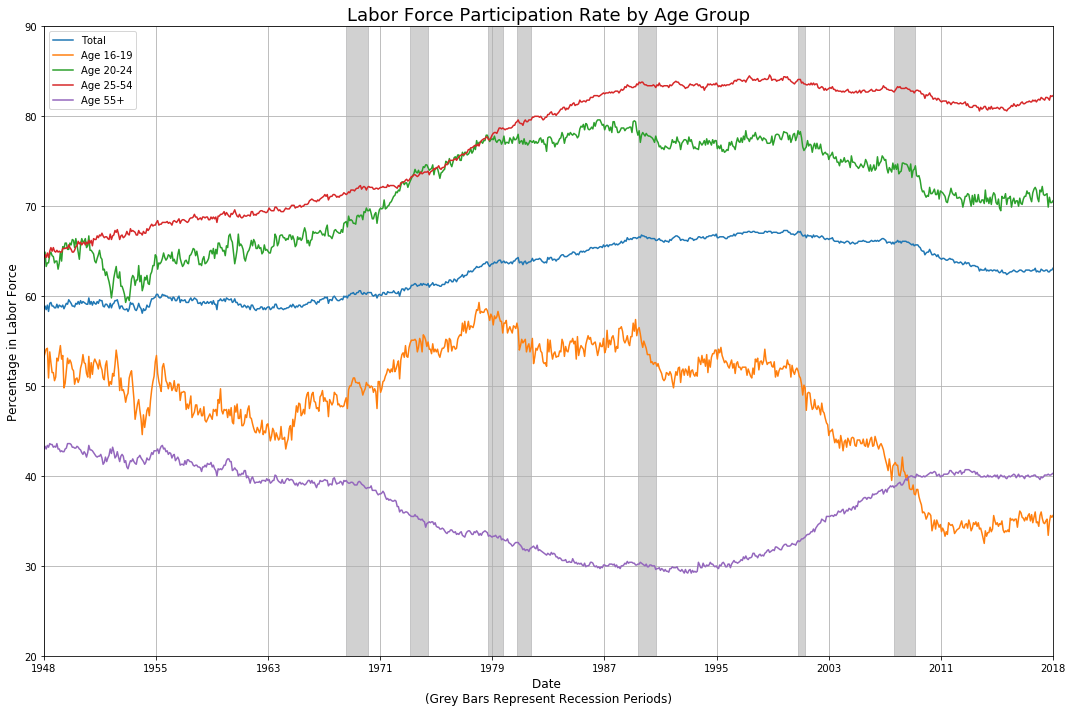

In [246]:
#PLOT PARCIPATION RATES FOR DIFFERENT GROUPS WITH VERTICAL GREY BARS TO INDICATE RECESSIONS

fig, ax = plt.subplots(figsize=(15,10))
for x in range (0,5):
    
    ax.plot(lf_dates, lf_combined[x], label=lf_labels[x])

for timeperiod in rec_start_end_full:
    ax.axvspan(timeperiod[0], timeperiod[1], color="#a4a4a5", alpha=.5)

plt.ylim(20,90)
plt.xlim(lf_dates[0], lf_dates[-1])
plt.xticks(lf_dateticks)
plt.legend()
plt.grid()
plt.title('Labor Force Participation Rate by Age Group', fontsize=18)
plt.ylabel('Percentage in Labor Force', fontsize=12)
plt.xlabel('Date \n(Grey Bars Represent Recession Periods)', fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig('images/Labor Force by Age.png')

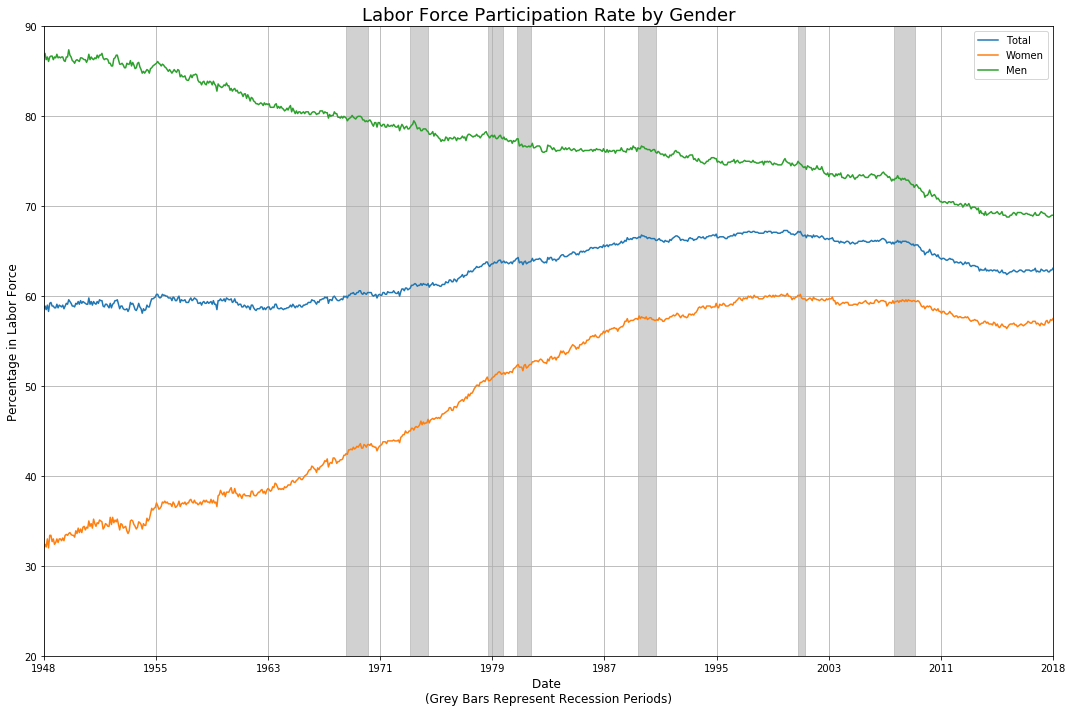

In [245]:
fig, ax = plt.subplots(figsize=(15,10))

for x in range(0,3):
    ax.plot(lf_dates, lf_sex_combined[x], label=lf_sex_labels[x])
    
for timeperiod in rec_start_end_full:
    ax.axvspan(timeperiod[0], timeperiod[1], color="#a4a4a5", alpha=.5)
    
plt.ylim(20,90)
plt.xlim(lf_dates[0], lf_dates[-1])
plt.xticks(lf_dateticks)
plt.legend()
plt.grid()
plt.title('Labor Force Participation Rate by Gender', fontsize=18)
plt.ylabel('Percentage in Labor Force', fontsize=12)
plt.xlabel('Date \n(Grey Bars Represent Recession Periods)', fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig('images/Labor Force Men Women.png')

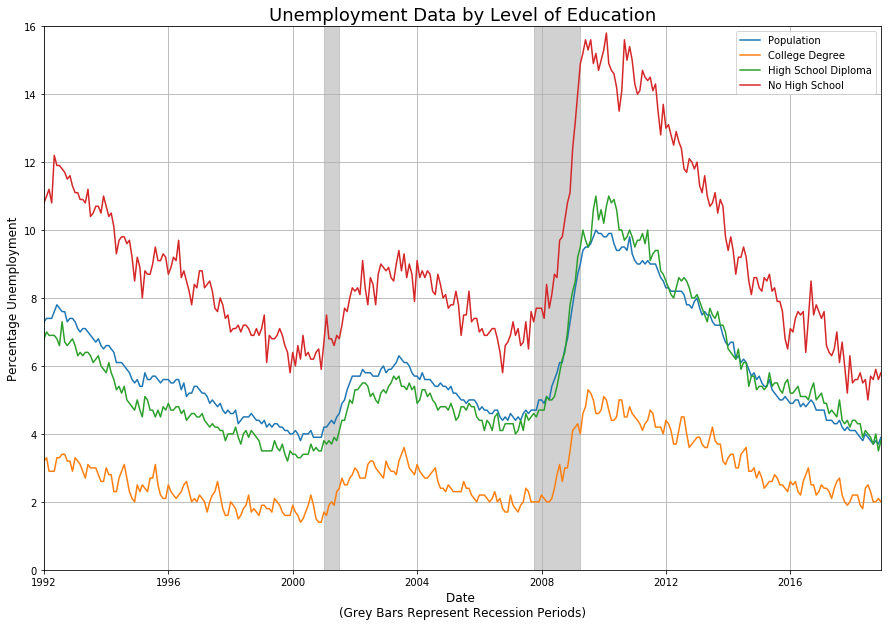

In [247]:
#PLOT UNEMPLOYMENT RATES FOR DIFFERENT GROUPS WITH VERTICAL GREY BARS TO INDICATE RECESSIONS

fig, ax = plt.subplots(figsize=(15,10))
for x in range (0,4):
    
    ax.plot(un_dates, un_combined[x], label=un_labels[x])
    
for timeperiod in unemployment_rec_dates:
    ax.axvspan(timeperiod[0], timeperiod[1], color="#a4a4a5", alpha=.5)

plt.xlim(un_dates[0], un_dates[-1])
plt.ylim(0,16)
plt.title('Unemployment Data by Level of Education', fontsize=18)
plt.ylabel('Percentage Unemployment', fontsize=12)
plt.xlabel('Date \n(Grey Bars Represent Recession Periods)', fontsize=12)
plt.legend()
plt.grid()
plt.show()
fig.savefig('images/Unemployment by Level of Education.png')

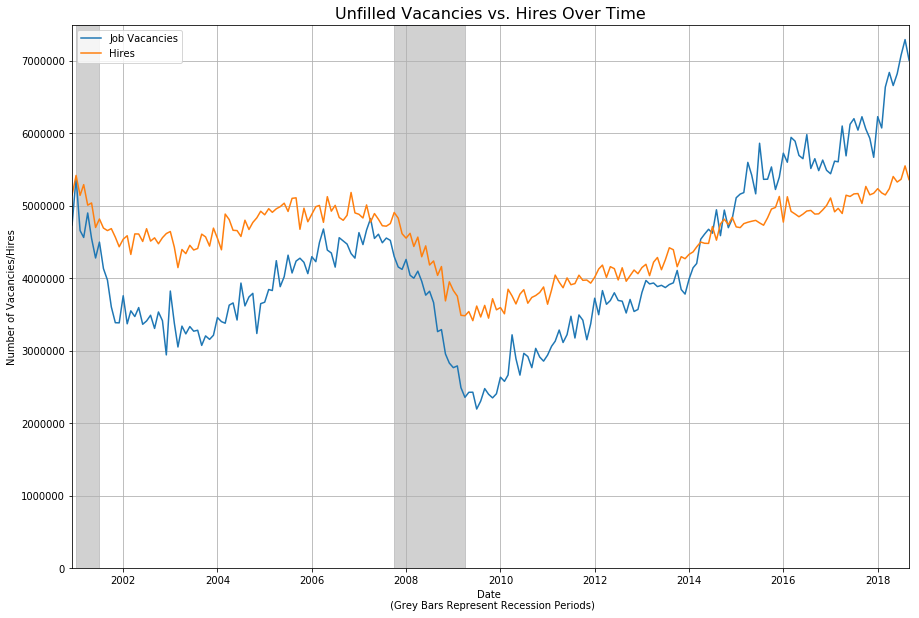

In [276]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(job_dates, job_data, label='Job Vacancies')
ax.plot(hires_dates, hires_data, label='Hires')
for timeperiod in unemployment_rec_dates:
    ax.axvspan(timeperiod[0], timeperiod[1], color="#a4a4a5", alpha=.5)
plt.xlim(job_dates[0], job_dates[-1])
plt.ylim(0,7500000)
plt.legend(loc='upper left')
plt.title('Unfilled Vacancies vs. Hires Over Time', fontsize=16)
plt.xlabel('Date \n (Grey Bars Represent Recession Periods)')
plt.ylabel('Number of Vacancies/Hires')
plt.grid()
fig.savefig('Job Vacancies.png')

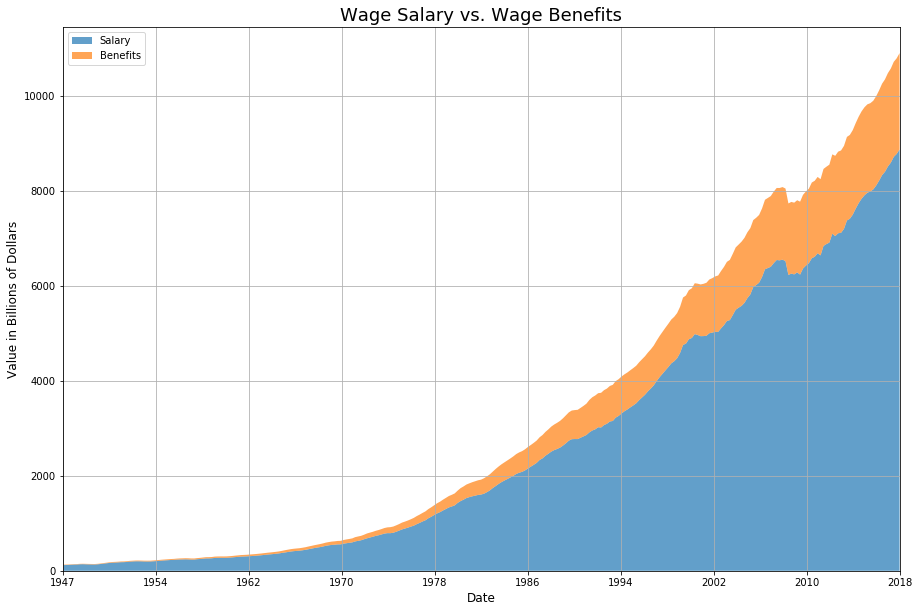

In [249]:
#GRAPH WAGE DATA
wage_yticks = np.arange(0.0,12001.0,1000.0,dtype='float64')
wyticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]
fig, ax = plt.subplots(figsize=(15,10))
ax.stackplot(wage_dates, wage_salary, wage_benefits, labels=['Salary', 'Benefits'], alpha=.7)
plt.xlim(wage_dates[0], wage_dates[-1])
plt.xticks(wage_dateticks)
plt.legend(loc='upper left')
#plt.yticks(wage_yticks)
#plt.yticks(wyticks)
plt.grid()
plt.title('Wage Salary vs. Wage Benefits', fontsize=18)
plt.ylabel('Value in Billions of Dollars', fontsize=12)
plt.xlabel('Date', fontsize=12)
type(wage_yticks[0])
fig.savefig('images/Wage Salary Benefits.png')

1080


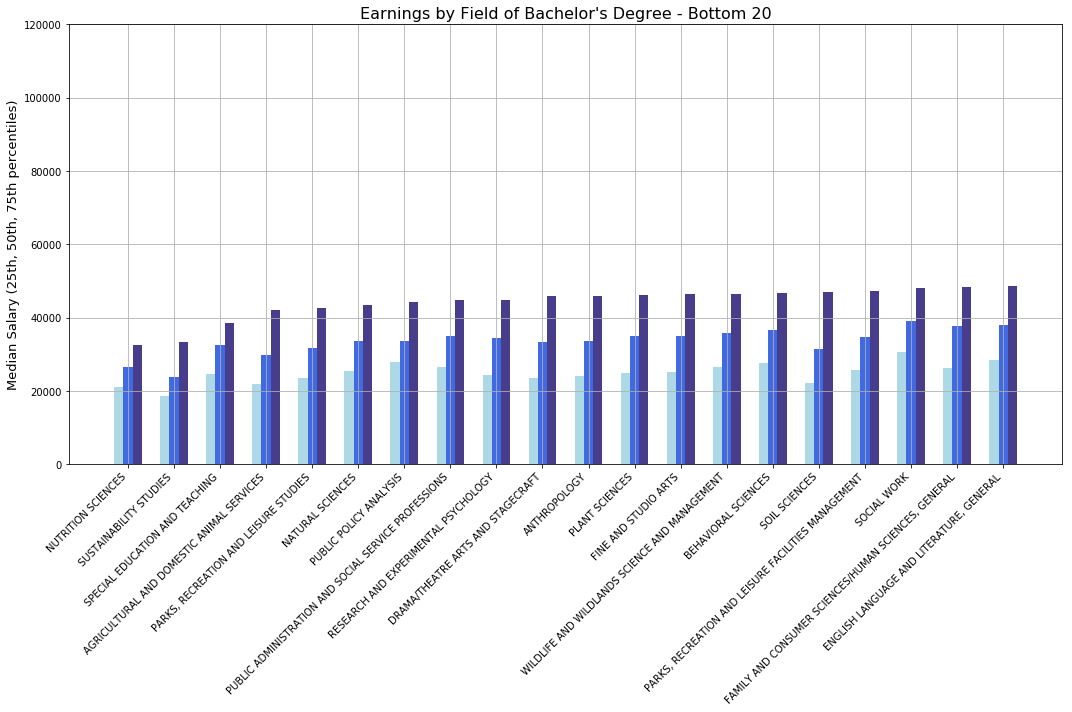

In [257]:
fig, ax = plt.subplots(figsize=(15,10))
x_ticks = np.arange(1,21,1)
x_labels = [field_b[x] for x in range(0,20)]
print(len(field))
for x in range(0,20):
    ax.bar(x=(x+1)-.2, height=p25_b[x], width=.2, color='lightblue')
    ax.bar(x=(x+1), height=p50_b[x], width=.2, color='royalblue')
    ax.bar(x=(x+1)+.2, height=p75_b[x], width=.2, color='darkslateblue')

plt.xticks(ticks=x_ticks, labels=x_labels, rotation='45', ha='right')
plt.title("Earnings by Field of Bachelor's Degree - Bottom 20", fontsize=16)
plt.ylabel('Median Salary (25th, 50th, 75th percentiles)', fontsize=13)
plt.ylim(0,120000)
plt.grid()
plt.tight_layout()
fig.savefig('images/Earnings Bachelor Bottom 20.png')

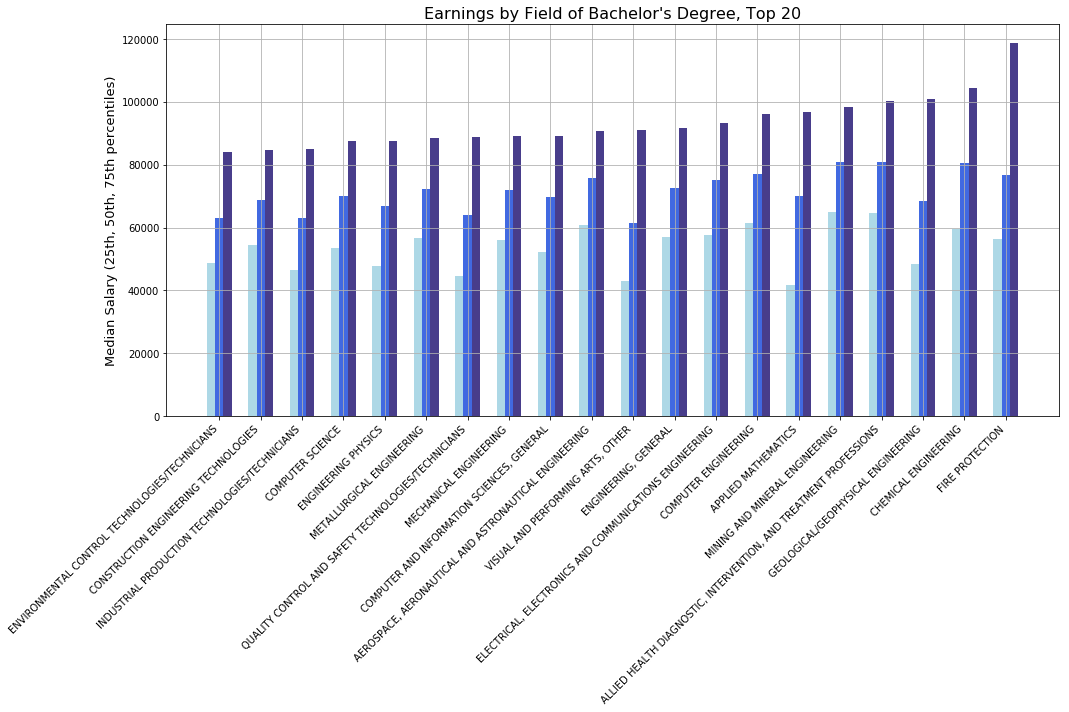

In [258]:
fig, ax = plt.subplots(figsize=(15,10))
x_ticks = np.arange(1,21,1)
x_labels = [field_b[x] for x in range(-21,-1)]

count_tick = 1
for x in range(-21,-1):

    ax.bar(x=count_tick-.2, height=p25_b[x], width=.2, color='lightblue')
    ax.bar(x=count_tick, height=p50_b[x], width=.2, color='royalblue')
    ax.bar(x=count_tick+.2, height=p75_b[x], width=.2, color='darkslateblue')
    count_tick += 1

plt.xticks(ticks=x_ticks, labels=x_labels, rotation='45', ha='right')
plt.title("Earnings by Field of Bachelor's Degree, Top 20", fontsize=16)
plt.ylabel('Median Salary (25th, 50th, 75th percentiles)', fontsize=13)
plt.grid()
plt.tight_layout()
fig.savefig('Earnings Bachelor Top 20.png')

1080


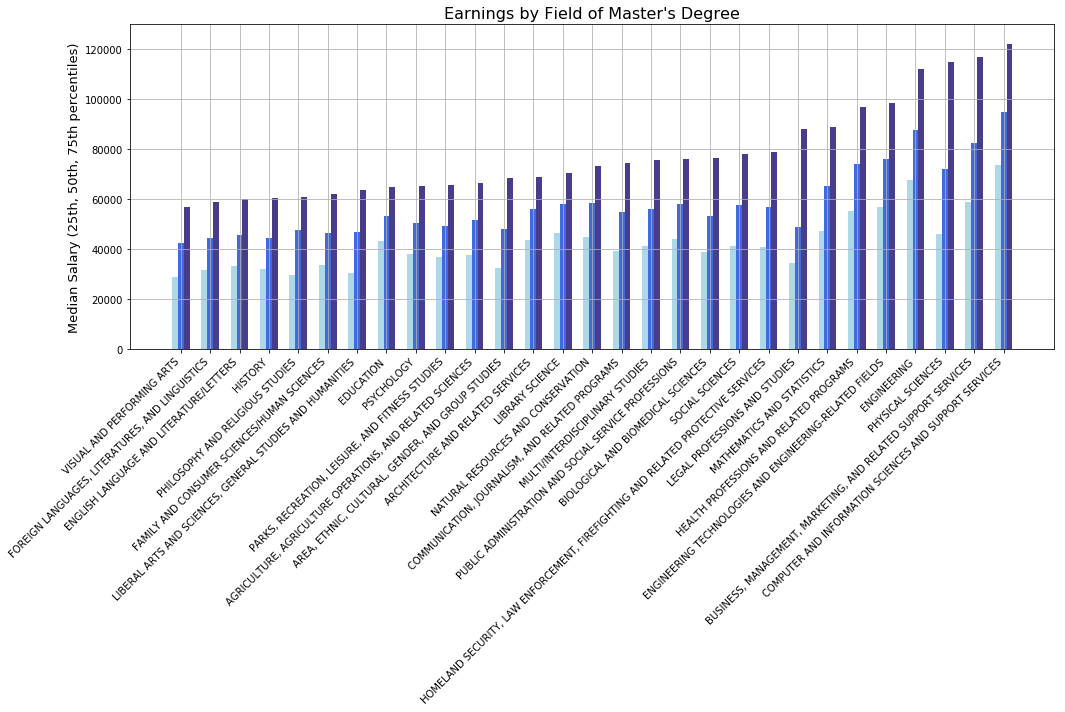

In [259]:
fig, ax = plt.subplots(figsize=(15,10))
x_ticks = np.arange(1,30,1)
x_labels = [field_m[x] for x in range(0,29)]
print(len(field))
for x in range(0,29):
    ax.bar(x=(x+1)-.2, height=p25_m[x], width=.2, color='lightblue')
    ax.bar(x=(x+1), height=p50_m[x], width=.2, color='royalblue')
    ax.bar(x=(x+1)+.2, height=p75_m[x], width=.2, color='darkslateblue')

plt.xticks(ticks=x_ticks, labels=x_labels, rotation='45', ha='right')
plt.title("Earnings by Field of Master's Degree", fontsize=16)
plt.ylabel('Median Salary (25th, 50th, 75th percentiles)', fontsize=13)
plt.ylim(0,130000)
plt.grid()
plt.tight_layout()
fig.savefig('images/Earnings Masters.png')

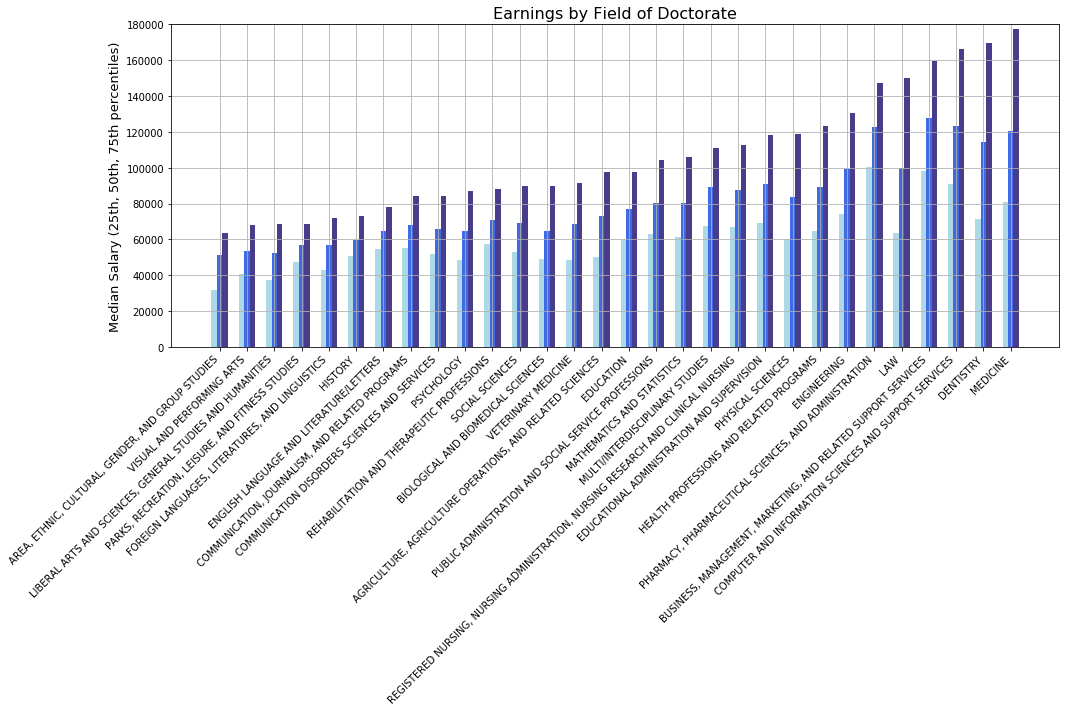

In [260]:
fig, ax = plt.subplots(figsize=(15,10))
x_ticks = np.arange(1,31,1)
x_labels = [field_d[x] for x in range(0,30)]

for x in range(0,30):
    ax.bar(x=(x+1)-.2, height=p25_d[x], width=.2, color='lightblue')
    ax.bar(x=(x+1), height=p50_d[x], width=.2, color='royalblue')
    ax.bar(x=(x+1)+.2, height=p75_d[x], width=.2, color='darkslateblue')

plt.xticks(ticks=x_ticks, labels=x_labels, rotation='45', ha='right')
plt.title("Earnings by Field of Doctorate", fontsize=16)
plt.ylabel('Median Salary (25th, 50th, 75th percentiles)', fontsize=13)
plt.ylim(0,180000)
plt.grid()
plt.tight_layout()
fig.savefig('images/Earnings PhD.png')

In [ ]:
#saved code for reference
testdate = '1/1/1948'
test = dt.datetime.strptime(testdate, '%m/%d/%Y').date()
test

In [272]:
hires_data

[5149000,
 5419000,
 5144000,
 5292000,
 5009000,
 5039000,
 4701000,
 4818000,
 4693000,
 4658000,
 4685000,
 4567000,
 4435000,
 4539000,
 4587000,
 4329000,
 4612000,
 4611000,
 4508000,
 4684000,
 4513000,
 4558000,
 4476000,
 4560000,
 4617000,
 4645000,
 4429000,
 4147000,
 4397000,
 4340000,
 4455000,
 4390000,
 4411000,
 4609000,
 4571000,
 4444000,
 4692000,
 4552000,
 4393000,
 4886000,
 4810000,
 4662000,
 4658000,
 4577000,
 4801000,
 4673000,
 4770000,
 4834000,
 4925000,
 4876000,
 4960000,
 4910000,
 4959000,
 4988000,
 5036000,
 4922000,
 5103000,
 5110000,
 4676000,
 4967000,
 4780000,
 4884000,
 4988000,
 5005000,
 4772000,
 5126000,
 4926000,
 5006000,
 4839000,
 4800000,
 4869000,
 5184000,
 4902000,
 4883000,
 4832000,
 5012000,
 4776000,
 4893000,
 4814000,
 4725000,
 4719000,
 4755000,
 4908000,
 4830000,
 4615000,
 4554000,
 4620000,
 4439000,
 4568000,
 4297000,
 4447000,
 4183000,
 4239000,
 4040000,
 4162000,
 3688000,
 3951000,
 3832000,
 3753000,
 3489000,
